In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

In [30]:
raw_dataset = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/auto-mpg.data", sep = ' ',comment = '\t', skipinitialspace = True, na_values = '?', names = columns)

In [31]:
raw_dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [32]:
raw_dataset.shape


(398, 8)

In [33]:

raw_dataset.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [34]:

raw_dataset['horsepower'].unique()


array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [35]:

# Replace by Mean
np.round(raw_dataset['horsepower'].mean()) 

raw_dataset['horsepower'].replace(np.nan, np.round(raw_dataset['horsepower'].mean()), inplace = True)


In [36]:

# Origin = 1:'USA', 2:'Europe', 3:'Japan'
origin = pd.get_dummies(raw_dataset['origin'])
origin


,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,1,0
395,1,0,0
396,1,0,0


In [37]:
mpg_df = pd.concat([raw_dataset, origin], axis = 1)

In [38]:
mpg_df.rename({1:'USA', 2:'Europe', 3:'Japan'}, axis = 1, inplace = True)

In [39]:
mpg_df.drop(['origin'], axis = 1, inplace=True)
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


<AxesSubplot:>

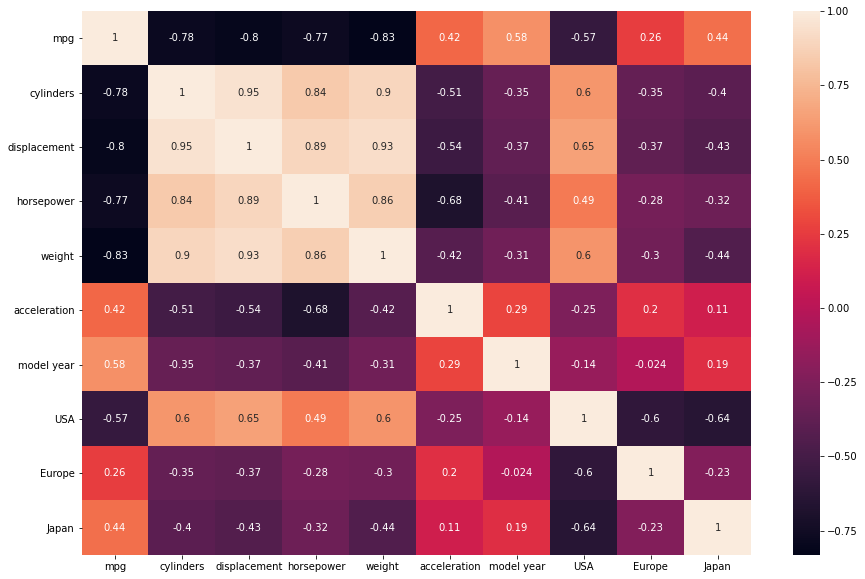

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(mpg_df.corr(), annot = True)

In [41]:
X = mpg_df.drop('mpg', axis = 1)
Y = mpg_df['mpg']

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
scaler_X = scaler.transform(X)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaler_X, Y, test_size = 0.2, random_state = 9)

In [44]:
from keras.models import Sequential
# Dense layer NN - It takes no. of units
from keras.layers import Dense 
from keras.optimizers import RMSprop

In [45]:
def build_model():
    # Sequential Neural Network
    model = Sequential()
    # Input Layers 
    # units = No. of Neurons, activation = 'relu', input_shape = No. of Features
    model.add(Dense(units = 64, activation='relu', input_shape = [len(X.keys())]))

    # Hidden Layers - I
    model.add(Dense(units = 128, activation='relu'))

    # Hidden Layers - II
    model.add(Dense(units = 128, activation='relu'))

    # Output Layers
    model.add(Dense(units = 1))

    # Optimizers - Learning Rate (0.00001 - 0.1)
    optimizers = RMSprop(learning_rate=0.0001)

    # Model Compiler
    model.compile(loss = 'mean_squared_error', optimizer = optimizers, metrics = ['mean_squared_error'])
    
    return model


In [46]:
model = build_model()

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 25,601
Trainable params: 25,601
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Epochs = Number of Iterations, Batch Size = Number of Samples per executions in each epochs
# Validation split = 15% of overall training samples to validate algorithm (test data size in each epoch)
history = model.fit(X_train, Y_train, epochs = 600, batch_size = 20, validation_split = 0.15)

Epoch 1/600
14/14 [==============================] - 3s 53ms/step - loss: 600.4711 - mean_squared_error: 600.4711 - val_loss: 658.8672 - val_mean_squared_error: 658.8672
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 593.5729 - mean_squared_error: 593.5729 - val_loss: 652.2489 - val_mean_squared_error: 652.2489
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 587.0580 - mean_squared_error: 587.0580 - val_loss: 645.3012 - val_mean_squared_error: 645.3012
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 579.8774 - mean_squared_error: 579.8774 - val_loss: 637.3559 - val_mean_squared_error: 637.3559
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 571.9070 - mean_squared_error: 571.9070 - val_loss: 628.6453 - val_mean_squared_error: 628.6453
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 563.0847 - mean_squared_error: 563.0847 - val_loss: 618.8284 - val_mean_squared_e

In [49]:
pd.DataFrame(history.history)

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,600.471130,600.471130,658.867249,658.867249
1,593.572937,593.572937,652.248901,652.248901
2,587.057983,587.057983,645.301208,645.301208
3,579.877441,579.877441,637.355896,637.355896
4,571.906982,571.906982,628.645325,628.645325
...,...,...,...,...
595,6.309649,6.309649,5.372412,5.372412
596,6.330776,6.330776,5.361523,5.361523
597,6.281364,6.281364,5.350456,5.350456
598,6.300185,6.300185,5.318952,5.318952


<AxesSubplot:>

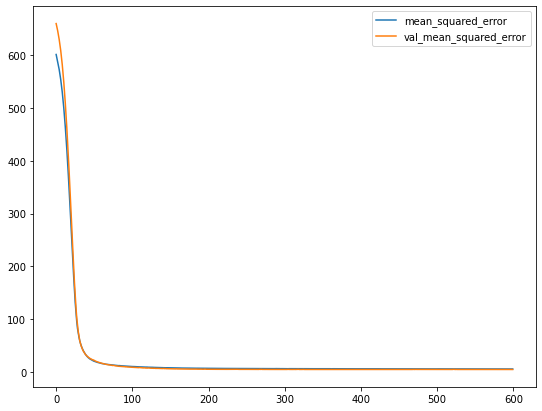

In [50]:
pd.DataFrame(history.history)[['mean_squared_error', 'val_mean_squared_error']].plot(figsize = (9,7))

In [51]:
model.evaluate(X_test, Y_test)

3/3 [==============================] - 0s 4ms/step - loss: 6.9095 - mean_squared_error: 6.9095


[6.909529209136963, 6.909529209136963]

In [52]:
# Regression Metrics - R2-score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
yhat=model.predict(X_test)
r2_score(Y_test, yhat)
mean_absolute_error(yhat, Y_test)

1.9196457147598267

In [53]:
mean_squared_error(yhat, Y_test)

6.909529290767099

In [54]:
X_new = [[8,	307.0,	130.0,	3504.0,	12.0,	70,	1,	0,	0]]
scaler_X_new = scaler.transform(X_new)
np.round(model.predict(scaler_X_new))

array([[17.]], dtype=float32)